## Exercise 2
The dataset is in "arff" format. You will easily understand the features and their possible values by inspecting the file. You may apply whatever transformation you like to transform the dataset in a more useful form for your task.
 
Tasks:
- 1.Provide an overview of the dataset size, features, and distribution of feature values.
- 2.Describe the average delays per airport/airline.
- 3.Identify and report the most prominent rules of association between delays and point of origin AND/OR point of arrival.
- 4.Try to predict the delay given all other features and report the appropriate performance on cross-validation.
- 5.Identify patterns/rules regarding delays and try to explain when delays should be expected, based on these patterns.

# 1. Provide an overview of the dataset size, features, and distribution of feature values.

The file Airlines.arff can not be read using the respective python library because of PA (1) airline. Therefore, we read the file line by line.

In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np

In [2]:
with open('Airlines.arff', 'r') as fp:
    file_content = fp.readlines()

In [3]:
columns = []
len_attr = len('@attribute')

# get the columns
for line in file_content:
    if line.startswith('@attribute '):
        col_name = line[len_attr:].split()[0]
        columns.append(col_name)

In [4]:
columns

['DayofWeek',
 'CRSDepTime',
 'UniqueCarrier',
 'FlightNum',
 'Origin',
 'Dest',
 'ArrDelay']

In [5]:
file_content[10]

'@data\n'

In [6]:
rawdata = []
for i in range(11,len(file_content)):
    tmp = file_content[i].split(',')
    tmp = [tmp.strip('\n') for tmp in tmp]
    rawdata.append(tmp)

In [7]:
df = pd.DataFrame(rawdata, columns=columns)

In [8]:
df

,DayofWeek,CRSDepTime,UniqueCarrier,FlightNum,Origin,Dest,ArrDelay
0,5,600,UA,899.0,ORD,IAD,-3
1,5,615,DL,357.0,IAD,ATL,5
2,5,615,UA,341.0,IAD,DEN,8
3,5,625,CO,581.0,IAD,DEN,44
4,5,630,UA,902.0,CLE,IAD,-10
...,...,...,...,...,...,...,...
100156,6,2140,UA,30.0,LAX,IAD,-19
100157,6,2140,CO,896.0,LAX,IAD,-23
100158,6,2150,UA,1094.0,IAD,BDL,-14
100159,6,2155,US,394.0,PIT,IAD,9


In [9]:
df.shape

(100161, 7)

In [10]:
df.dtypes

DayofWeek        object
CRSDepTime       object
UniqueCarrier    object
FlightNum        object
Origin           object
Dest             object
ArrDelay         object
dtype: object

The dataframe was not parsed properly. Therefore, we decided to write the dataframe as csv and read it again using read_csv function.

In [11]:
df.to_csv('transformed_dataset.csv', index=False)

In [12]:
df=pd.read_csv('transformed_dataset.csv', dtype={'UniqueCarrier':'category',
                                                'Origin':'category',
                                                'Dest':'category'})

In [13]:
df.head()

,DayofWeek,CRSDepTime,UniqueCarrier,FlightNum,Origin,Dest,ArrDelay
0,5,600,UA,899.0,ORD,IAD,-3
1,5,615,DL,357.0,IAD,ATL,5
2,5,615,UA,341.0,IAD,DEN,8
3,5,625,CO,581.0,IAD,DEN,44
4,5,630,UA,902.0,CLE,IAD,-10


In [14]:
df.dtypes

DayofWeek           int64
CRSDepTime          int64
UniqueCarrier    category
FlightNum         float64
Origin           category
Dest             category
ArrDelay            int64
dtype: object

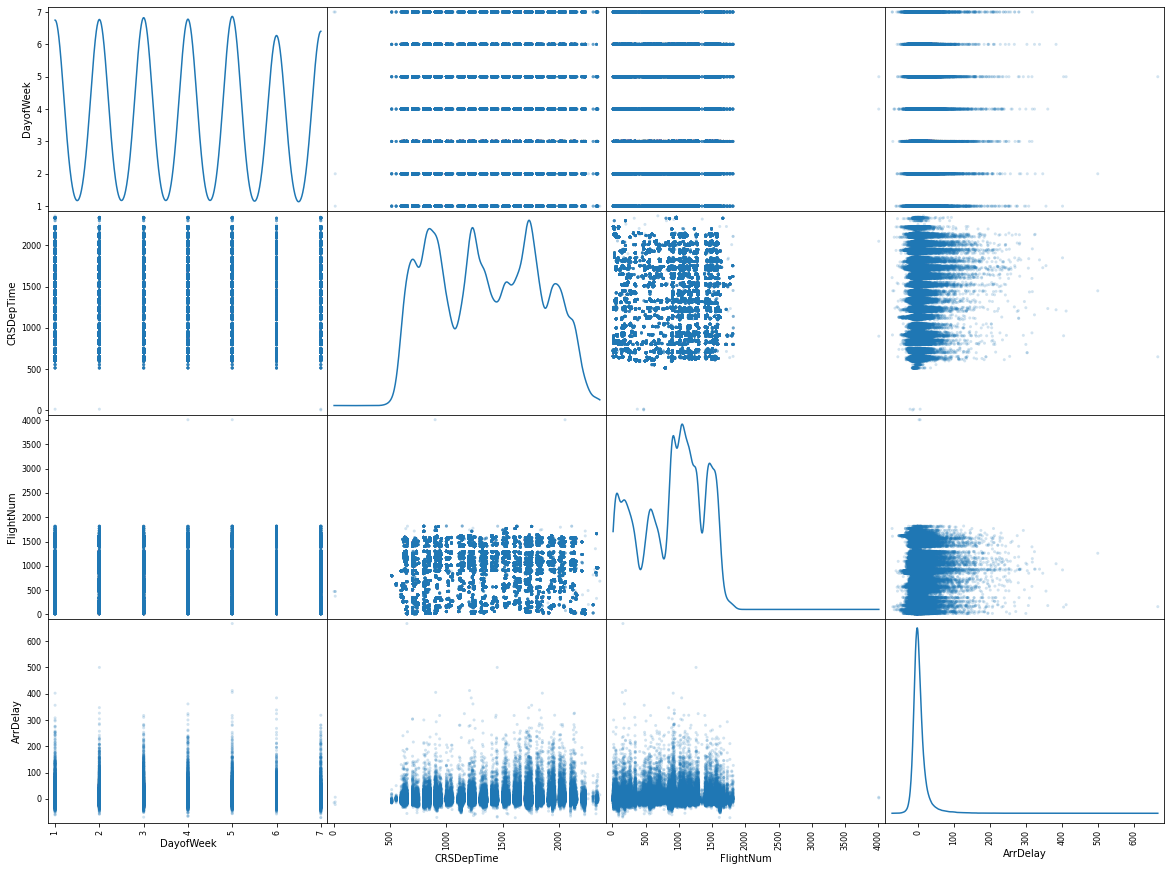

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(20, 15), diagonal='kde');

# 2. Describe the average delays per airport/airline.

We see that arrival delay (ArrDelay) can be positive or negative number in the dataset. This means that some flights arrived earlier than expected.

In [15]:
average_ArrDelay_by_airline=df[['UniqueCarrier','ArrDelay']].groupby('UniqueCarrier').mean()
average_ArrDelay_by_airline.sort_values('ArrDelay',ascending=False)

,ArrDelay
UniqueCarrier,
'PA (1)',16.223642
EA,11.728169
US,6.246798
TW,5.179647
DL,5.118715
NW,5.004890
CO,4.919948
UA,4.569664
AA,1.908237


If we consider only the delays and not the flights that arrived earlier:

In [16]:
df_delays = df.loc[df['ArrDelay'] > 0]
average_delay_by_airline = df_delays[['UniqueCarrier','ArrDelay']].groupby('UniqueCarrier').mean()
average_delay_by_airline2 = average_delay_by_airline.sort_values('ArrDelay',ascending=False)
average_delay_by_airline2

,ArrDelay
UniqueCarrier,
EA,29.656250
CO,25.263850
'PA (1)',24.626087
TW,20.492208
AA,17.602251
UA,17.565617
NW,16.083420
DL,15.932035
US,12.017257


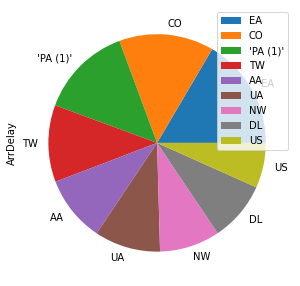

In [17]:
pieplot=average_delay_by_airline2.plot.pie(y='ArrDelay', figsize=(5, 5))

Delays per origin airport

In [18]:
average_delay_by_origin_airport=df_delays[['Origin','ArrDelay']].groupby('Origin').mean()
average_delay_by_origin_airport.sort_values('ArrDelay',ascending=False)

,ArrDelay
Origin,
DCA,48.000000
JFK,38.975000
SJU,36.394118
HPN,34.638095
ORD,24.410609
DEN,23.060732
BOS,22.447967
EWR,20.637500
PBI,20.354108


Average delays per destination airport

In [19]:
average_delay_by_destination_airport=df_delays[['Origin','ArrDelay']].groupby('Origin').mean()
average_delay_by_destination_airport.sort_values('ArrDelay',ascending=False)

,ArrDelay
Origin,
DCA,48.000000
JFK,38.975000
SJU,36.394118
HPN,34.638095
ORD,24.410609
DEN,23.060732
BOS,22.447967
EWR,20.637500
PBI,20.354108


# 3. Identify and report the most prominent rules of association between delays and point of origin AND/OR point of arrival.

In [20]:
average_delay_by_origin_and_dest=df_delays[['Origin','Dest','ArrDelay']].groupby(['Origin','Dest']).count()
average_delay_by_origin_and_dest.sort_values('ArrDelay',ascending=False)

ArrDelay
Origin Dest          
ATL    IAD       1607
ORD    IAD       1527
DEN    IAD       1449
IAD    DEN       1427
       ORD       1317
...               ...
IAH    DEN          0
       DFW          0
       DTW          0
       EWR          0
TPA    TPA          0

[3422 rows x 1 columns]

In [21]:
average_delay_by_origin_airport=df_delays[['Origin','ArrDelay']].groupby(['Origin']).count()
average_delay_by_origin_airport.sort_values('ArrDelay',ascending=False)

,ArrDelay
Origin,
IAD,25327
ATL,1607
ORD,1527
DEN,1449
BOS,1230
LAX,1144
PIT,1068
LGA,959
BDL,876


In [22]:
average_delay_by_dest_airport=df_delays[['Dest','ArrDelay']].groupby(['Dest']).count()
average_delay_by_dest_airport.sort_values('ArrDelay',ascending=False)

,ArrDelay
Dest,
IAD,23360
DEN,1427
ORD,1317
ATL,1300
PIT,1176
EWR,1173
BOS,1157
LGA,1150
LAX,1072


# 4. Predict the delay given all other features and report the appropriate performance on cross-validation.


## Outlier detection

In [23]:
df

,DayofWeek,CRSDepTime,UniqueCarrier,FlightNum,Origin,Dest,ArrDelay
0,5,600,UA,899.0,ORD,IAD,-3
1,5,615,DL,357.0,IAD,ATL,5
2,5,615,UA,341.0,IAD,DEN,8
3,5,625,CO,581.0,IAD,DEN,44
4,5,630,UA,902.0,CLE,IAD,-10
...,...,...,...,...,...,...,...
100156,6,2140,UA,30.0,LAX,IAD,-19
100157,6,2140,CO,896.0,LAX,IAD,-23
100158,6,2150,UA,1094.0,IAD,BDL,-14
100159,6,2155,US,394.0,PIT,IAD,9


In [24]:
from scipy import stats
df['Outlier']=stats.zscore(df['ArrDelay'])<3
df[df['Outlier']==False]

,DayofWeek,CRSDepTime,UniqueCarrier,FlightNum,Origin,Dest,ArrDelay,Outlier
382,6,1010,UA,1423.0,BDL,IAD,195,False
434,6,1250,UA,20.0,SFO,IAD,100,False
518,6,1735,NW,574.0,MSP,IAD,95,False
526,6,1745,TW,891.0,IAD,LAX,113,False
538,6,1824,EA,946.0,SJU,IAD,229,False
...,...,...,...,...,...,...,...,...
99878,5,1950,UA,710.0,ORD,IAD,91,False
99938,6,700,UA,1030.0,MCO,IAD,303,False
99944,6,725,NW,1441.0,IAD,DTW,100,False
99982,6,920,UA,1214.0,BNA,IAD,80,False


In [25]:
import numpy as np
import matplotlib.pyplot as plt


y= df['ArrDelay']

y_ok = df[df['Outlier']==True]
y_ok = y_ok['ArrDelay']

x_ok = df[df['Outlier']==True]
x_ok = df[df['Outlier']==True]
x_ok = x_ok['FlightNum']

y_delay = df[df['Outlier']==False]
y_delay = y_delay['ArrDelay']

x_delay = df[df['Outlier']==False]
x_delay = x_delay['FlightNum']

In [26]:
y_delay.shape

(1857,)

1857 outliers out of 100161 instances, which is ~1.85% of the dataset.

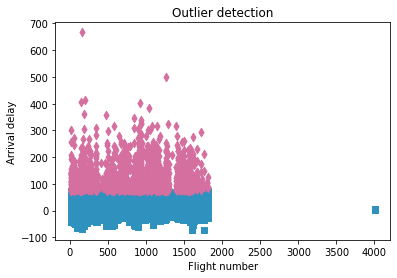

In [27]:
fig=plt.figure()
ax=fig.add_subplot(111)
# plot points inside distribution's width
ax.scatter(x_ok, y_ok, marker="s", color="#2e91be")
# plot points outside distribution's width
ax.scatter(x_delay, y_delay, marker="d", color="#d46f9f")
plt.title("Outlier detection")
plt.xlabel("Flight number")
plt.ylabel("Arrival delay")
plt.show()

## Split of dataset in training and test set 

In [28]:
df_no_outlier = df[df['Outlier']==True]
df_no_outlier_response=df_no_outlier[['ArrDelay']]
df_no_outlier_response

,ArrDelay
0,-3
1,5
2,8
3,44
4,-10
...,...
100156,-19
100157,-23
100158,-14
100159,9


In [29]:
df_no_outlier_features=df_no_outlier[['DayofWeek', 'CRSDepTime', 'UniqueCarrier', 'FlightNum', 'Origin', 'Dest']]
df_no_outlier_features

,DayofWeek,CRSDepTime,UniqueCarrier,FlightNum,Origin,Dest
0,5,600,UA,899.0,ORD,IAD
1,5,615,DL,357.0,IAD,ATL
2,5,615,UA,341.0,IAD,DEN
3,5,625,CO,581.0,IAD,DEN
4,5,630,UA,902.0,CLE,IAD
...,...,...,...,...,...,...
100156,6,2140,UA,30.0,LAX,IAD
100157,6,2140,CO,896.0,LAX,IAD
100158,6,2150,UA,1094.0,IAD,BDL
100159,6,2155,US,394.0,PIT,IAD


In [30]:
df_no_outlier_features_numeric_features = df_no_outlier_features[['DayofWeek','CRSDepTime','FlightNum']]

In [31]:
from pandas import get_dummies
df_no_outlier_features_UniqueCarrier = get_dummies(df_no_outlier_features['UniqueCarrier'])

In [32]:
df_no_outlier_features_Origin = get_dummies(df_no_outlier_features['Origin'])
df_no_outlier_features_Origin.columns = [str(col) + '_Origin' for col in df_no_outlier_features_Origin.columns]
df_no_outlier_features_Origin

,ATL_Origin,BDL_Origin,BNA_Origin,BOS_Origin,BTV_Origin,BUF_Origin,BWI_Origin,CAE_Origin,CHS_Origin,CLE_Origin,...,SAV_Origin,SDF_Origin,SEA_Origin,SFO_Origin,SJU_Origin,SLC_Origin,SRQ_Origin,STL_Origin,SYR_Origin,TPA_Origin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
df_no_outlier_features_Dest = get_dummies(df_no_outlier_features['Dest'])
df_no_outlier_features_Dest.columns = [str(col) + '_Dest' for col in df_no_outlier_features_Dest.columns]
df_no_outlier_features_Dest

,ATL_Dest,BDL_Dest,BNA_Dest,BOS_Dest,BTV_Dest,BUF_Dest,BWI_Dest,CAE_Dest,CHS_Dest,CLE_Dest,...,SAV_Dest,SDF_Dest,SEA_Dest,SFO_Dest,SJU_Dest,SLC_Dest,SRQ_Dest,STL_Dest,SYR_Dest,TPA_Dest
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100158,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
frames = [df_no_outlier_features_numeric_features, df_no_outlier_features_UniqueCarrier, df_no_outlier_features_Origin, df_no_outlier_features_Dest]
frames

[        DayofWeek  CRSDepTime  FlightNum
 0               5         600      899.0
 1               5         615      357.0
 2               5         615      341.0
 3               5         625      581.0
 4               5         630      902.0
 ...           ...         ...        ...
 100156          6        2140       30.0
 100157          6        2140      896.0
 100158          6        2150     1094.0
 100159          6        2155      394.0
 100160          6        2230       16.0
 
 [98304 rows x 3 columns],
         'PA (1)'  AA  CO  DL  EA  NW  TW  UA  US
 0              0   0   0   0   0   0   0   1   0
 1              0   0   0   1   0   0   0   0   0
 2              0   0   0   0   0   0   0   1   0
 3              0   0   1   0   0   0   0   0   0
 4              0   0   0   0   0   0   0   1   0
 ...          ...  ..  ..  ..  ..  ..  ..  ..  ..
 100156         0   0   0   0   0   0   0   1   0
 100157         0   0   1   0   0   0   0   0   0
 100158         0

In [35]:
df_no_outlier_dataset = pd.concat(frames,  axis=1)
df_no_outlier_dataset

,DayofWeek,CRSDepTime,FlightNum,'PA (1)',AA,CO,DL,EA,NW,TW,...,SAV_Dest,SDF_Dest,SEA_Dest,SFO_Dest,SJU_Dest,SLC_Dest,SRQ_Dest,STL_Dest,SYR_Dest,TPA_Dest
0,5,600,899.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,615,357.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,615,341.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,625,581.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,630,902.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100156,6,2140,30.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100157,6,2140,896.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100158,6,2150,1094.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100159,6,2155,394.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_no_outlier_dataset, df_no_outlier_response, test_size=0.20)

In [37]:
 X_train

,DayofWeek,CRSDepTime,FlightNum,'PA (1)',AA,CO,DL,EA,NW,TW,...,SAV_Dest,SDF_Dest,SEA_Dest,SFO_Dest,SJU_Dest,SLC_Dest,SRQ_Dest,STL_Dest,SYR_Dest,TPA_Dest
44206,2,1850,1066.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67929,2,1610,1582.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85447,5,1245,530.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45697,1,1700,674.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77577,6,2150,318.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,7,2005,718.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41101,4,1225,1584.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35408,1,2015,1088.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
78476,3,800,1298.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
 y_train

,ArrDelay
44206,2
67929,9
85447,11
45697,60
77577,-13
...,...
10861,-2
41101,-6
35408,0
78476,5


In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_train_scaled

,DayofWeek,CRSDepTime,FlightNum,'PA (1)',AA,CO,DL,EA,NW,TW,...,SAV_Dest,SDF_Dest,SEA_Dest,SFO_Dest,SJU_Dest,SLC_Dest,SRQ_Dest,STL_Dest,SYR_Dest,TPA_Dest
0,0.166667,0.436644,0.287397,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.639983,0.285392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.500000,0.314640,0.009020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.833333,0.278253,0.221498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.666667,0.517979,0.224004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78638,0.000000,0.361729,0.251817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78639,0.000000,0.342466,0.142320,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78640,0.833333,0.312500,0.041092,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78641,0.666667,0.351027,0.171135,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)
X_test_scaled

,DayofWeek,CRSDepTime,FlightNum,'PA (1)',AA,CO,DL,EA,NW,TW,...,SAV_Dest,SDF_Dest,SEA_Dest,SFO_Dest,SJU_Dest,SLC_Dest,SRQ_Dest,STL_Dest,SYR_Dest,TPA_Dest
0,0.833333,0.382321,0.097399,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.100325,0.652463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.500000,0.100325,0.558384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.500000,0.715835,0.500277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.833333,0.672451,0.131157,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19656,0.833333,0.434924,0.449917,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19657,0.833333,0.930043,0.002214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19658,0.500000,0.054230,0.182070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19659,0.333333,0.772777,0.826231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model selection

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
models = []
models.append(('Linear regression', LinearRegression()))
models.append(('Ridge regression', Ridge()))
models.append(('ElasticNet', ElasticNet()))
models.append(('KNeighborsRegressor', KNeighborsRegressor()))

In [63]:
# The scoring function to use
scoring = 'neg_mean_squared_error'

In [64]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# We are going to evaluate all classifiers, and store results in two lists:
results = []
names   = []
for name, model in models:
  kfold = KFold(n_splits=10)
  cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print("%03s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std()))

Linear regression: -227.419068 (+/- 4.384804)
Ridge regression: -227.367978 (+/- 4.385461)
ElasticNet: -238.577967 (+/- 4.747330)
KNeighborsRegressor: -234.876955 (+/- 2.226645)


<IPython.core.display.Javascript object>


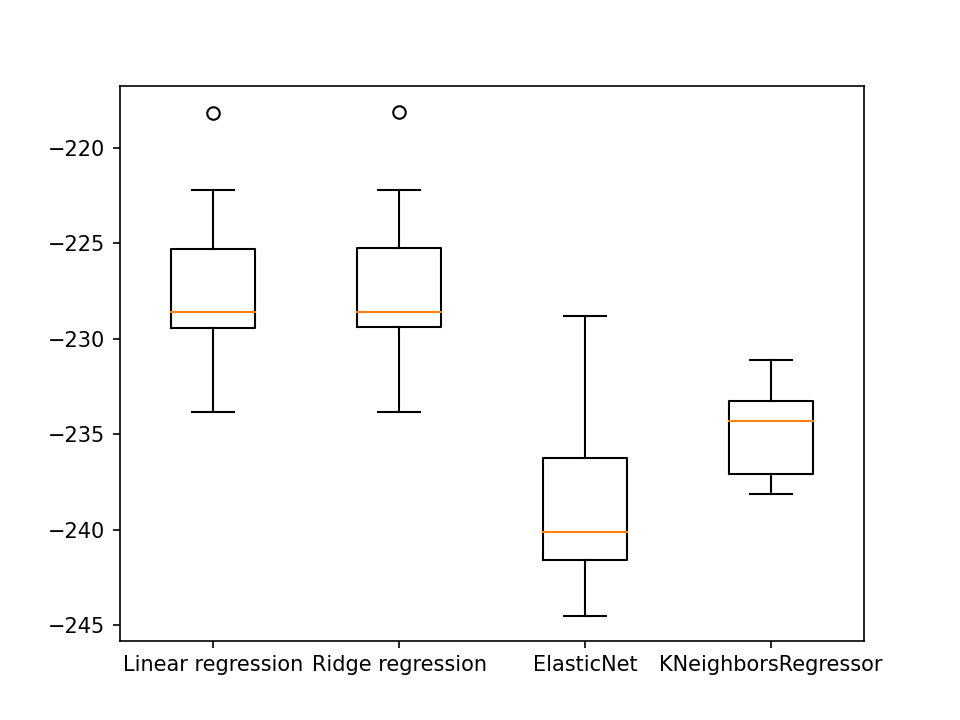

In [65]:
%matplotlib notebook

plt.boxplot(results)
plt.xticks(list(range(1,len(names)+1)), names)
plt.show()

Ridge Regression
Ridge regression is an extension of linear regression where the loss function is modified to minimize the complexity of the model. This modification is done by adding a penalty parameter that is equivalent to the square of the magnitude of the coefficients.

Loss function = OLS + alpha * summation (squared coefficient values)

In the above loss function, alpha is the parameter we need to select. A low alpha value can lead to over-fitting, whereas a high alpha value can lead to under-fitting.

In [66]:
clf = Ridge(alpha=1.0)
clf.fit(X_train_scaled, y_train)

Ridge()

In [68]:
from sklearn.model_selection import GridSearchCV
params_grid = {'alpha': [1,0.1,0.01,0.001,0.0001,0] , 
               "fit_intercept": [True, False], 
               "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

In [69]:
Ridge_model = GridSearchCV(clf, param_grid=params_grid, n_jobs=2)

In [71]:
Ridge_model.fit(X_train_scaled,y_train)
Ridge_model.best_params_

{'alpha': 1, 'fit_intercept': False, 'solver': 'sparse_cg'}

## Evaluation of overfit, mean squared error and r2 to the test set.

In [90]:
pred_train_rr= Ridge_model.predict(X_train_scaled)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

15.054263649665407
0.05004532227288938


In [91]:
from sklearn.metrics import r2_score, mean_squared_error
predicted = Ridge_model.predict(X_test_scaled)
print(np.sqrt(mean_squared_error(y_test,predicted)))
print(r2_score(y_test, predicted))

15.227529263561017
0.04111550761173255


# 5. Identify patterns/rules regarding delays and try to explain when delays should be expected, based on these patterns.

## Delay rules by explanatory analysis

In [61]:
df_no_outlier_features_2=df_no_outlier[['DayofWeek', 'CRSDepTime', 'UniqueCarrier', 'FlightNum', 'Origin', 'Dest','ArrDelay']]
avg_del_org=average_delay_by_origin_airport
index = df_no_outlier_features_2.index
number_of_rows = len(index)
avg_del_org_2=avg_del_org/number_of_rows*100
avg_del_org_2.sort_values('ArrDelay',ascending=False).head(5)

,ArrDelay
Origin,
IAD,25.763957
ATL,1.634725
ORD,1.553345
DEN,1.473999
BOS,1.251221


In [62]:
avg_del_dest=average_delay_by_destination_airport
avg_del_dest_2=avg_del_dest/number_of_rows*100
avg_del_dest_2.sort_values('ArrDelay',ascending=False).head(5)

,ArrDelay
Origin,
DCA,0.048828
JFK,0.039647
SJU,0.037022
HPN,0.035236
ORD,0.024832


One rule is that there is 25% chance of delay when an airplane comes from IAD airport. We could set a baseline threshold to a specific percentage (e.g. 1,25%) and extract more rules like this one.

## Apriori

In [132]:
df_delays

,DayofWeek,CRSDepTime,UniqueCarrier,FlightNum,Origin,Dest,ArrDelay
1,5,615,DL,357.0,IAD,ATL,5
2,5,615,UA,341.0,IAD,DEN,8
3,5,625,CO,581.0,IAD,DEN,44
7,5,636,UA,951.0,IAD,RIC,1
12,5,650,CO,264.0,BOS,IAD,6
...,...,...,...,...,...,...,...
100143,6,1847,UA,90.0,DEN,IAD,3
100145,6,1915,DL,1089.0,IAD,ATL,14
100148,6,2010,CO,897.0,IAD,LAX,13
100151,6,2026,DL,1496.0,ATL,IAD,48


In [133]:
df_delays.to_csv('flights_with_delays.csv', index=False)

In [159]:
apriori_input = pd.read_csv('flights_with_delays.csv', dtype={
    'DayofWeek':'str',
    'CRSDepTime':'str',
    'UniqueCarrier':'str',
    'FlightNum':'str',
    'Origin':'str',
    'Dest':'str',
    'ArrDelay':'str'
})
apriori_input2 = apriori_input[['Origin','Dest']].values.tolist()

In [160]:
from efficient_apriori import apriori
itemsets, rules = apriori(apriori_input2, min_support=0.05, min_confidence=0.05)

Most frequently delayed flight roots

In [161]:
rules

[{IAD} -> {ATL},
 {ATL} -> {IAD},
 {IAD} -> {DEN},
 {DEN} -> {IAD},
 {ORD} -> {IAD},
 {IAD} -> {ORD}]

In [162]:
itemsets

{1: {('IAD',): 48687, ('ATL',): 2907, ('DEN',): 2876, ('ORD',): 2844},
 2: {('ATL', 'IAD'): 2907, ('DEN', 'IAD'): 2876, ('IAD', 'ORD'): 2844}}

Most frequently delayed airlines based on the departure time

In [172]:
apriori_input3 = apriori_input[['UniqueCarrier','CRSDepTime']].values.tolist()
itemsets, rules = apriori(apriori_input3, min_support=0.01, min_confidence=0.01)

In [173]:
rules

[{UA} -> {1730},
 {1730} -> {UA},
 {UA} -> {1745},
 {1745} -> {UA},
 {UA} -> {700},
 {700} -> {UA},
 {UA} -> {855},
 {855} -> {UA}]

In [174]:
itemsets

{1: {('DL',): 2619,
  ('UA',): 30480,
  ('CO',): 4260,
  ('700',): 975,
  ('EA',): 736,
  ('NW',): 2889,
  ('AA',): 3731,
  ('800',): 751,
  ('900',): 546,
  ('1230',): 621,
  ('1240',): 585,
  ('1655',): 523,
  ('US',): 2202,
  ('TW',): 1540,
  ('1730',): 830,
  ('1745',): 713,
  ('1245',): 594,
  ('1605',): 488,
  ('845',): 506,
  ('855',): 620},
 2: {('1730', 'UA'): 528,
  ('1745', 'UA'): 499,
  ('700', 'UA'): 686,
  ('855', 'UA'): 566}}

Most frequently delayed airlines based on the day of the week

In [181]:
apriori_input4 = apriori_input[['DayofWeek','UniqueCarrier']].values.tolist()
itemsets, rules = apriori(apriori_input4, min_support=0.02, min_confidence=0.02)

In [182]:
itemsets

{1: {('5',): 7712,
  ('DL',): 2619,
  ('UA',): 30480,
  ('CO',): 4260,
  ('NW',): 2889,
  ('AA',): 3731,
  ('US',): 2202,
  ('TW',): 1540,
  ('6',): 5680,
  ('7',): 6160,
  ('1',): 6877,
  ('2',): 7190,
  ('3',): 7514,
  ('4',): 7554},
 2: {('5', 'UA'): 4897,
  ('6', 'UA'): 3434,
  ('7', 'UA'): 3746,
  ('1', 'UA'): 4284,
  ('2', 'UA'): 4561,
  ('3', 'UA'): 4766,
  ('4', 'UA'): 4792}}

In [183]:
rules

[{UA} -> {5},
 {5} -> {UA},
 {UA} -> {6},
 {6} -> {UA},
 {UA} -> {7},
 {7} -> {UA},
 {UA} -> {1},
 {1} -> {UA},
 {UA} -> {2},
 {2} -> {UA},
 {UA} -> {3},
 {3} -> {UA},
 {UA} -> {4},
 {4} -> {UA}]